## PD6
### Adrian Kamiński

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

import random

In [2]:
dataset = fetch_olivetti_faces()

In [3]:
X = dataset['data']

In [4]:
y = dataset['target']

In [5]:
images = dataset['images']

### 0. Narysować wybrane obrazy.

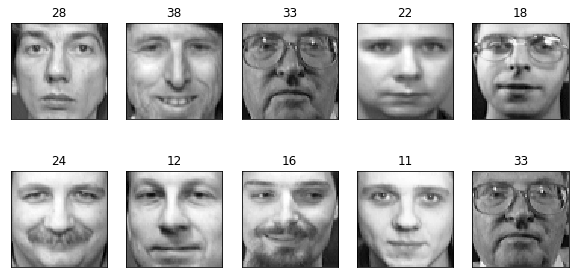

In [6]:
nrows, ncols = 2, 5
plt.figure(figsize=(10,5))
plt.gray()
random.seed(150001)
j = random.sample(list(np.arange(0,400)), 10)

for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(images[j[i],...])
    plt.xticks([]); plt.yticks([])
    plt.title(y[j[i]])
plt.show()

### 1. Wykorzystać algorytm PCA do kompresji zbioru Olivetti Faces. Dobrać odpowiednią liczbę składowych. Po transformacji obliczyć stopień kompresji. Rozmiar obrazka: liczba wartości numerycznych

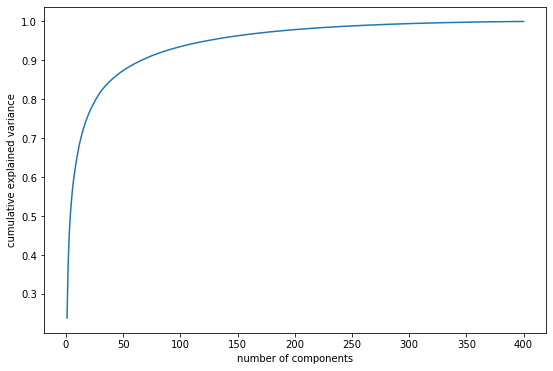

In [7]:
pca = PCA().fit(X)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
sum(pca.explained_variance_ratio_[0:40])

0.8506850050762296

In [9]:
pca = PCA(n_components = 0.85).fit(X)
pca.n_components_

40

40 składowych

In [10]:
X_pca = pca.transform(X)

In [11]:
X_pca.shape

(400, 40)

Stopień kompresji, czyli:
$$CR = \frac{|RozmiarPrzedSkompresowaniem|}{|RozmiarPoSkompresowaniu|}$$

In [12]:
CR = X.shape[1]/X_pca.shape[1]
print(f'CR = {CR}')

CR = 102.4


### 2. Przeprowadzić transformację odwrotną (inverse_transform). Narysować, porównać z pkt. 0. Obliczyć błąd rekonstrukcji w postaci błędu RMSE dla każdego obrazu

In [13]:
X_inv = pca.inverse_transform(X_pca)

In [14]:
pd.DataFrame(X-X_inv)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.014822,0.025489,0.008069,-0.042897,-0.028355,-0.021255,-0.020521,-0.028607,-0.049686,-0.071118,...,0.055427,0.076922,0.145150,0.242654,0.156590,-0.139363,-0.140216,-0.096192,-0.066424,-0.082548
1,-0.143560,-0.127450,-0.091075,-0.059275,-0.045350,-0.036028,-0.017991,-0.011247,-0.009818,-0.026180,...,-0.012870,-0.008209,-0.028632,-0.012453,-0.013675,-0.031741,-0.082807,-0.067756,-0.043539,-0.019800
2,0.046122,0.051394,0.042320,0.021799,0.056675,0.064786,0.058100,0.037481,0.026874,-0.006147,...,-0.162754,-0.072234,0.035975,0.012467,0.005159,-0.016416,-0.074277,-0.074705,-0.049236,-0.032382
3,0.037173,0.029370,0.020995,0.015582,-0.014892,-0.060888,-0.072534,0.016914,0.041652,0.029205,...,0.049664,0.033185,0.038514,0.063086,0.051693,0.021606,0.045898,0.020556,0.019441,0.054051
4,0.040164,0.037987,0.016218,0.008206,-0.008372,0.008511,-0.005778,-0.007579,-0.013672,-0.009901,...,0.060424,0.043393,0.037840,0.059313,0.003903,-0.027140,-0.009426,-0.016266,-0.021850,-0.007267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.057914,-0.027733,-0.005961,0.040624,0.021331,-0.031082,-0.051575,-0.094581,-0.081865,-0.057896,...,0.047818,0.110171,0.002278,-0.151971,-0.041458,0.049949,0.075430,-0.038665,-0.062352,-0.108011
396,0.041498,0.034658,0.009150,-0.066702,-0.121950,-0.161611,-0.105119,-0.037097,-0.019313,0.006684,...,-0.065695,-0.128005,-0.189961,-0.217911,-0.168637,-0.119504,-0.045780,-0.007172,0.065907,0.118694
397,0.001618,-0.032881,-0.001554,0.010085,0.025411,-0.012792,-0.018021,-0.032044,-0.047186,-0.037736,...,0.051118,-0.006177,-0.054361,-0.063637,-0.052459,-0.050031,-0.045917,-0.025803,-0.040340,-0.016763
398,-0.024336,-0.047858,-0.059205,-0.064755,-0.065544,-0.115458,-0.108679,-0.076599,-0.044918,-0.020114,...,-0.057991,-0.125391,-0.186986,-0.197216,-0.140377,-0.107240,-0.074440,-0.023864,0.031871,0.068792


In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
rmse_for_each_image = mean_squared_error(np.transpose(X_inv), np.transpose(X), squared=False, multioutput='raw_values')

In [17]:
rmse_for_each_image.shape

(400,)

In [18]:
from scipy import stats
stats.describe(rmse_for_each_image)

DescribeResult(nobs=400, minmax=(0.035927147, 0.083706215), mean=0.05296682, variance=7.1642884e-05, skewness=0.5792427659034729, kurtosis=0.035108781687834156)

In [19]:
from scipy import ndimage

In [20]:
# forumla jak zmienic X na images (np.reshape(X,images.shape) = images)
(np.reshape(X,images.shape)==images).sum() == X.shape[0] * X.shape[1] 

True

In [21]:
X_shape = X.shape

In [22]:
images_shape = images.shape

In [23]:
def X_to_3D(X, shape=images_shape):
    return np.reshape(X, shape)
def X_to_2D(X, shape=X_shape):
    return np.reshape(X, shape)

In [24]:
def plot(X_modified, X_modified_inv, names=None, inverse=True):
    nrows, ncols = 2, 10
    plt.figure(figsize=(14,5))
    plt.gray()
    X = X_modified
    
    text = 'original' 
    title=True
    for i in range(ncols * nrows):
        ax = plt.subplot(nrows, ncols, i + 1)
        if i == 10:
            X=X_modified_inv
            title = False
        if i >9:
            i=i-10
            text = 'after inverse transformation' if inverse else 'modified'
        
        if i==5:
            plt.text(1,-30,text,fontsize=16, weight='bold', ha='center')
        ax.matshow(X_to_3D(X, (10,64,64))[i,...])
        plt.xticks([]); plt.yticks([])
        if names is not None and title:
            plt.title(names[i])
        
    plt.show()

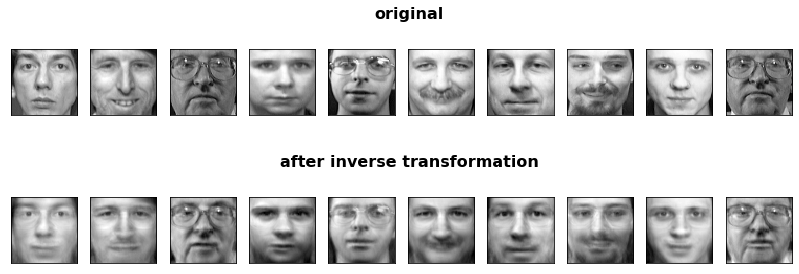

In [25]:
plot(X[j], X_inv[j], names=None)

### 3. Przygotować kilka / kilkanaście zmodyfikowanych obrazów (np. obróconych o 90 stopni, przyciemnionych, odbitych w poziomie).

In [26]:
rotated_90 = j[0:2]

In [27]:
rotated_90

[285, 380]

In [28]:
X_modified = X.copy()

In [29]:
results = np.empty(shape=(2,64,64))

In [30]:
for i in range(len(rotated_90)):
    results[i] = ndimage.rotate(X_to_3D(X)[rotated_90][i], 90, reshape=False)

In [31]:
X_modified[rotated_90] = X_to_2D(results, shape=(2,4096))

In [32]:
rotated_180 = j[2:4]
rotated_180

[335, 222]

In [33]:
results = np.empty(shape=(2,64,64))
for i in range(len(rotated_180)):
    results[i] = ndimage.rotate(X_to_3D(X)[rotated_180][i], 180, reshape=False)

In [34]:
X_modified[rotated_180] = X_to_2D(results, shape=(2,4096))

In [35]:
filtered = j[4:6]

In [36]:
filtered

[180, 246]

In [37]:
X_modified[filtered] = X_to_2D(ndimage.gaussian_filter(X_to_3D(X)[filtered], 1.05), shape = (2, 4096))

In [38]:
darken = j[6:8]

In [39]:
X_modified[darken] = np.clip(X[darken]-0.25,0,1)

In [40]:
brighten = j[8:10]

In [41]:
X_modified[brighten] = np.clip(X[brighten]+0.25,0,1)

In [42]:
modified = j

In [43]:
modified

[285, 380, 335, 222, 180, 246, 122, 163, 115, 339]

In [44]:
modification_type = ['rotated_90']*2 + ['rotated_180']*2 + ['filtered']*2 + ['darken']*2 + ['brighten']*2

#### Oryginalne a zmodyfikowane zdjęcia 

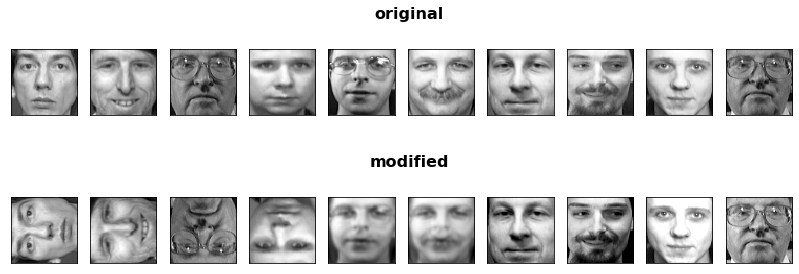

In [45]:
plot(X[modified], X_modified[modified], inverse=False)

### 4. Korzystając z modelu wyuczonego w pkt. 1 przeprowadzić transformację, a następnie odwrotną transformację obrazów z pkt. 3. Obliczyć błąd rekonstrukji dla każdego typu modyfikacji. Porównać z wartościami błędu uzyskanymi w pkt. 2.

In [46]:
X_modified_pca = pca.transform(X_modified[modified])

In [47]:
X_modified_inv = pca.inverse_transform(X_modified_pca)

In [48]:
rmse_modified = mean_squared_error(np.transpose(X_modified_inv), np.transpose(X[modified]),
                                   squared=False, multioutput='raw_values')

In [49]:
results = pd.DataFrame(data={'Original RMSE': rmse_for_each_image[modified],
                             'Modified RMSE': rmse_modified},
                       index = [modification_type, modified])
results

Original RMSE  Modified RMSE
rotated_90  285       0.053182       0.141584
            380       0.038795       0.119453
rotated_180 335       0.051014       0.142111
            222       0.039852       0.224553
filtered    180       0.054879       0.083659
            246       0.043554       0.068528
darken      122       0.046941       0.252296
            163       0.056228       0.251392
brighten    115       0.047517       0.241804
            339       0.056217       0.254488

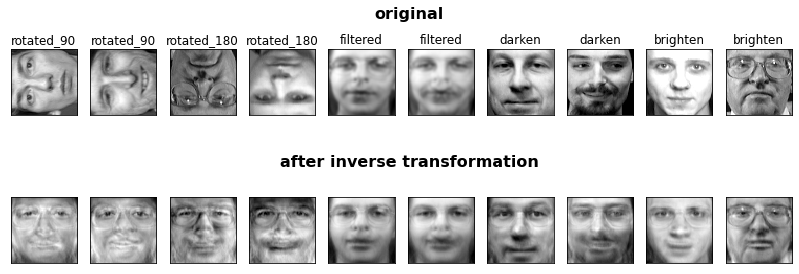

In [50]:
plot(X_modified[modified], X_modified_inv, modification_type)

### 5. Czy PCA może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy? Jeżeli tak to jakich?

In [51]:
results.index.set_names(["modification", "index"], inplace=True)

In [52]:
results.groupby("modification").mean()

,Original RMSE,Modified RMSE
modification,,
brighten,0.051867,0.248146
darken,0.051584,0.251844
filtered,0.049217,0.076094
rotated_180,0.045433,0.183332
rotated_90,0.045989,0.130519


Na podstawie wyników RMSE można stwierdzić, że PCA jest w stanie wykryć takie anomalie w zdjęciach twarzy jak
- Rozjaśnianie/przyciemnianie
- Obrócenia

Widzimy też że nałożenie pewnego filtru (rozmycia) nie wpyłneło na wynik błędu rekonstrucji w tak dużym stopniu jak w przypadku pozostałych modyfikacji (PCA nie wykryło dużej zmiany).